In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [65]:
target_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']
train_csv = "../planttraits2024/train.csv"
train = pd.read_csv(train_csv)

In [66]:
try_file = "../TRY/32975.txt"
try_data = pd.read_csv(try_file, sep="\t", encoding="latin1")
try_data.describe()

/tmp/ipykernel_153790/2579891813.py:2: DtypeWarning: Columns (1,10,14,15,16,18,19,21,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  try_data = pd.read_csv(try_file, sep="\t", encoding="latin1")


,DatasetID,AccSpeciesID,ObservationID,ObsDataID,TraitID,DataID,OrigUncertaintyStr,StdValue,RelUncertaintyPercent,OrigObsDataID,ErrorRisk,Unnamed: 28
count,5.113231e+06,5.113231e+06,5.113231e+06,5.113231e+06,495712.000000,5.113231e+06,11257.000000,8.498400e+05,0.0,2.169850e+05,494537.000000,0.0
mean,3.609605e+02,6.179551e+04,3.174491e+06,3.142657e+07,148.592425,2.612443e+03,42.841826,4.464795e+02,NaN,1.343968e+07,1.617697,NaN
std,1.830282e+02,9.192234e+04,1.755055e+06,1.855156e+07,602.759671,3.067184e+03,162.310726,5.901743e+04,NaN,2.044020e+07,1.488526,NaN
min,1.000000e+00,1.000000e+00,1.547200e+04,4.405820e+05,4.000000,4.000000e+00,0.000000,-1.597000e+02,NaN,4.405830e+05,0.002724,NaN
25%,2.690000e+02,1.937400e+04,2.389779e+06,1.976714e+07,26.000000,1.130000e+02,1.000000,4.928000e-01,NaN,9.672690e+05,0.798753,NaN
50%,4.120000e+02,3.867800e+04,3.029751e+06,3.000330e+07,26.000000,5.000000e+02,1.760000,2.627009e+00,NaN,6.231616e+06,1.262810,NaN
75%,4.310000e+02,5.304400e+04,3.143359e+06,4.043536e+07,26.000000,6.712000e+03,12.500000,4.195833e+01,NaN,8.647189e+06,1.956270,NaN
max,7.760000e+02,4.618340e+05,6.510626e+06,6.490681e+07,3112.000000,9.782000e+03,2000.000000,2.050000e+07,NaN,6.473544e+07,36.082300,NaN


In [67]:
try_data.columns
try_data.iloc[3]

LastName                                                       Cornelissen
FirstName                                                         Johannes
DatasetID                                                               37
Dataset                                                 Sheffield Database
SpeciesName                                               Acer platanoides
AccSpeciesID                                                           854
AccSpeciesName                                            Acer platanoides
ObservationID                                                        15473
ObsDataID                                                           440585
TraitID                                                               26.0
TraitName                                                    Seed dry mass
DataID                                                                  30
DataName                                                     Seed dry mass
OriglName                

In [68]:
print(try_data.columns)
print(f'Number of rows: {len(try_data)}')
print(f'Number of unique observationIDs: {len(try_data["ObservationID"].drop_duplicates(inplace=False))}')
print(f'Number of unique species (AccSpeciesID): {len(try_data["AccSpeciesID"].drop_duplicates(inplace=False))}')
print(f'Number of unique traits (TraitID): {len(try_data["TraitID"].drop_duplicates(inplace=False))}')


Index(['LastName', 'FirstName', 'DatasetID', 'Dataset', 'SpeciesName',
       'AccSpeciesID', 'AccSpeciesName', 'ObservationID', 'ObsDataID',
       'TraitID', 'TraitName', 'DataID', 'DataName', 'OriglName',
       'OrigValueStr', 'OrigUnitStr', 'ValueKindName', 'OrigUncertaintyStr',
       'UncertaintyName', 'Replicates', 'StdValue', 'UnitName',
       'RelUncertaintyPercent', 'OrigObsDataID', 'ErrorRisk', 'Reference',
       'Comment', 'StdValueStr', 'Unnamed: 28'],
      dtype='object')
Number of rows: 5113231
Number of unique observationIDs: 468474
Number of unique species (AccSpeciesID): 54511
Number of unique traits (TraitID): 6


In [69]:
# grouped_species = try_data.groupby(["AccSpeciesID", "TraitName"])
# print(len(grouped_species))
# grouped_species["OrigValueStr"].mean()
try_data_selection = try_data[['AccSpeciesID', 'SpeciesName', 'ObservationID', 'TraitID', 'TraitName', 'StdValue']]


try_data_selection['StdValue'] = pd.to_numeric(try_data_selection['StdValue'])
grouped = try_data_selection.groupby(['AccSpeciesID', 'SpeciesName', 'ObservationID', 'TraitID', 'TraitName']).mean().reset_index()
grouped.to_csv("avg_trait_values.tsv", sep="\t")
grouped.head(20)

/tmp/ipykernel_153790/24321033.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_data_selection['StdValue'] = pd.to_numeric(try_data_selection['StdValue'])


,AccSpeciesID,SpeciesName,ObservationID,TraitID,TraitName,StdValue
0,1,Aa sp,1288703,50.0,Leaf nitrogen (N) content per leaf area,2.798400
1,1,Aa sp,3028602,50.0,Leaf nitrogen (N) content per leaf area,2.798400
2,2,Abarema adenophora,251630,4.0,"Stem specific density (SSD, stem dry mass per ...",0.757475
3,2,Abarema adenophora,251630,50.0,Leaf nitrogen (N) content per leaf area,1.980407
4,2,Abarema adenophora,1305103,4.0,"Stem specific density (SSD, stem dry mass per ...",0.569442
5,2,Abarema adenophora,1305103,50.0,Leaf nitrogen (N) content per leaf area,2.483537
6,2,Abarema adenophora,2391872,3112.0,"Leaf area (in case of compound leaves: leaf, u...",18391.400000
7,2,Abarema adenophora,3044384,50.0,Leaf nitrogen (N) content per leaf area,1.980407
8,2,Abarema adenophora,3061340,50.0,Leaf nitrogen (N) content per leaf area,2.483537
9,2,Pithecellobium adenophorum,748090,4.0,"Stem specific density (SSD, stem dry mass per ...",0.360000


In [70]:
print(f'Number of unique traits (TraitID): {len(grouped["TraitID"].drop_duplicates(inplace=False))}')
print(grouped["TraitID"].drop_duplicates(inplace=False))

Number of unique traits (TraitID): 5
0        50.0
2         4.0
6      3112.0
15       26.0
272      18.0
Name: TraitID, dtype: float64


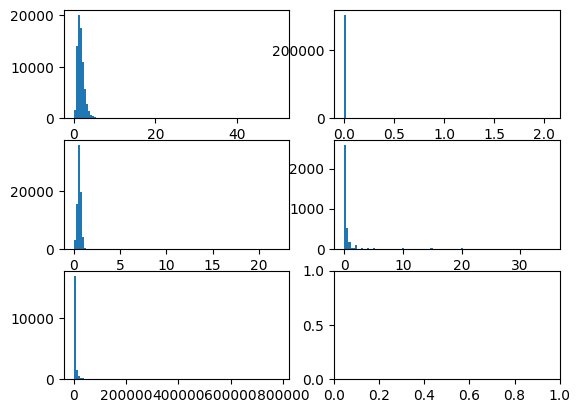

In [71]:
fig, axs = plt.subplots(3, 2)
traits = grouped["TraitID"].drop_duplicates(inplace=False)
for i, trait in enumerate(traits):
	axs[i + (-3 if i > 2 else 0), 1 if i > 2 else 0].hist(grouped[grouped["TraitID"]==trait]["StdValue"], bins=100)